# Higgs Boson Machine Learning Classification

In [1]:
import pandas as pd
pd.options.display.max_columns = None #this lets pandas show all columns instead of '...'

import numpy as np
from matplotlib import pyplot as plt

## Now let's have a look at the dataset

In [2]:
data_full = pd.read_csv('dataset_higgs_challenge.csv')
data_full.head(10)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.904263,b,t,6.245333
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.025434,b,t,0.083414
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.000814,s,t,0.002653
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.005721,s,t,0.018636
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.614803,b,t,5.296003
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.000461,s,t,0.001502


In [3]:
print('Total number of events: ', len(data_full), '\n')
for KaggleSetID in ['t', 'b', 'v', 'u']:
    print('Number of events in the {} KaggleSet: {}'
          .format(KaggleSetID, len(data_full['KaggleSet'][data_full['KaggleSet']==KaggleSetID])))

Total number of events:  818238 

Number of events in the t KaggleSet: 250000
Number of events in the b KaggleSet: 100000
Number of events in the v KaggleSet: 450000
Number of events in the u KaggleSet: 18238


## Now let's split the data into training and validation set

In [4]:
train_data = data_full[data_full['KaggleSet']=='t']
validation_data = data_full[data_full['KaggleSet']=='b']

y_train = pd.get_dummies(train_data['Label']).values.astype(float) #signal = [0,1], background = [1,0]
y_val = pd.get_dummies(validation_data['Label']).values.astype(float)

del(data_full) #delete memory because I dont need the test set at the moment 
len(train_data), len(validation_data)

(250000, 100000)

## Lets divide the dataset according to the number of jets because of the different event topologies

In [5]:
X = train_data.iloc[:,1:-4]
X_val = validation_data.iloc[:,1:-4]


##### 0 jets
X_0jets = X[ X['PRI_jet_num']==0 ].drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                                         'DER_lep_eta_centrality', 'PRI_jet_num', 'PRI_jet_leading_pt', 
                                         'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 
                                         'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_jet_num'], 
                                        axis =1)
X_val_0jets = X_val[ X_val['PRI_jet_num']==0 ].drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                                         'DER_lep_eta_centrality', 'PRI_jet_num', 'PRI_jet_leading_pt', 
                                         'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 
                                         'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_jet_num'], 
                                        axis =1)
y_train_0jets = y_train[ X['PRI_jet_num']==0 ]
y_val_0jets = y_val[ X_val['PRI_jet_num']==0 ]


##### 1 jet
X_1jet = X[ X['PRI_jet_num']==1 ].drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                                        'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 
                                        'DER_lep_eta_centrality', 'PRI_jet_num'], axis=1)
X_val_1jet = X_val[ X_val['PRI_jet_num']==1 ].drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                                        'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 
                                        'DER_lep_eta_centrality', 'PRI_jet_num'], axis=1)
y_train_1jet = y_train[ X['PRI_jet_num']==1 ]
y_val_1jet = y_val[ X_val['PRI_jet_num']==1 ]


##### 2 or 3 jets, maybe I can also try with a separation between the 2 and 3 jets 
X_2jets = X[ X['PRI_jet_num']>=2 ]
X_val_2jets = X_val[ X_val['PRI_jet_num']>=2 ]
y_train_2jets = y_train[ X['PRI_jet_num']>=2 ]
y_val_2jets = y_val[ X_val['PRI_jet_num']>=2 ]


##### Idea: build a 2 jets category where the VBF cuts are opposite and train a new NN 


##### VBF category, not sure if I should really use this 
X_VBF = X_2jets [ (X_2jets['PRI_jet_leading_pt'] >= 50) & (X_2jets['PRI_jet_subleading_pt'] >= 30) & 
                 (X_2jets['DER_deltaeta_jet_jet'] >= 3) & (X_2jets['DER_mass_vis']>=40) ]
X_val_VBF = X_val_2jets [ (X_val_2jets['PRI_jet_leading_pt'] >= 50) & (X_val_2jets['PRI_jet_subleading_pt'] >= 30)
                         & (X_val_2jets['DER_deltaeta_jet_jet'] >= 3) & (X_val_2jets['DER_mass_vis']>=40) ]
y_train_VBF = y_train_2jets [ (X_2jets['PRI_jet_leading_pt'] >= 50) & (X_2jets['PRI_jet_subleading_pt'] >= 30) &
                             (X_2jets['DER_deltaeta_jet_jet'] >= 3) & (X_2jets['DER_mass_vis']>=40) ]
y_val_VBF = y_val_2jets [ (X_val_2jets['PRI_jet_leading_pt'] >= 50) & (X_val_2jets['PRI_jet_subleading_pt'] >= 30) 
                         & (X_val_2jets['DER_deltaeta_jet_jet'] >= 3) & (X_val_2jets['DER_mass_vis']>=40) ]

In [60]:
len(X_2jets), len(X_VBF)

(72543, 21257)

### Later we will also need the weights:

In [7]:
weights = validation_data['Weight']

weights_0jets = weights[ X_val['PRI_jet_num']==0 ].reset_index(drop=True)
weights_1jet = weights[ X_val['PRI_jet_num']==1 ].reset_index(drop=True)
weights_2jets = weights[ X_val['PRI_jet_num']>=2 ]
weights_VBF = weights_2jets [ (X_val_2jets['PRI_jet_leading_pt'] >= 50) & (X_val_2jets['PRI_jet_subleading_pt'] >= 30) 
                         & (X_val_2jets['DER_deltaeta_jet_jet'] >= 3) & (X_val_2jets['DER_mass_vis']>=40) ].reset_index(drop=True)
weights_2jets = weights_2jets.reset_index(drop=True)

## Let's perform a scaling of input variables

In [8]:
from sklearn.preprocessing import StandardScaler #This is the best one (I tried also other of course)

standard_VBF = StandardScaler()
standard_VBF.fit(X_VBF)
X_VBF_standard = standard_VBF.transform(X_VBF)
X_val_VBF_standard = standard_VBF.transform(X_val_VBF)

C:\Users\flori\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\flori\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\flori\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Now let's use a DNN

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.regularizers import l1
from keras.layers import Dropout
#Too much higher validation loss in data. So i added a regularizer.
#I added also dropout to have better shape. 

model_1 = Sequential()
l1_lambda = 0.0001
dropout=0.2
model_1.add(Dense(units=128, activation='relu', kernel_regularizer=l1(l1_lambda), input_dim=30))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=64, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=32, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=16, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=8, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=4, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_1.add(Dropout(dropout))
model_1.add(Dense(units=2, activation='softmax'))

model_1.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [10]:
model_1.compile(optimizer='adagrad', #adagrad is the best one for this classification.
              loss='categorical_crossentropy', #This seems one of the best loss function.
              metrics=['accuracy'])

In [11]:
history = model_1.fit(X_VBF_standard, y_train_VBF, batch_size=512, epochs=100, verbose=1, 
                  validation_data=(X_val_VBF_standard, y_val_VBF))

y_pred = model_1.predict(X_val_VBF_standard)

Train on 21257 samples, validate on 8489 samples
Epoch 1/100
21257/21257 [==============================] - 1s 30us/step - loss: 0.6706 - accuracy: 0.6940 - val_loss: 0.5885 - val_accuracy: 0.7008
Epoch 2/100
21257/21257 [==============================] - 0s 15us/step - loss: 0.6015 - accuracy: 0.7121 - val_loss: 0.5494 - val_accuracy: 0.8235
Epoch 3/100
21257/21257 [==============================] - 0s 13us/step - loss: 0.5743 - accuracy: 0.8091 - val_loss: 0.5225 - val_accuracy: 0.8389
Epoch 4/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.5458 - accuracy: 0.8260 - val_loss: 0.5064 - val_accuracy: 0.8510
Epoch 5/100
21257/21257 [==============================] - 0s 13us/step - loss: 0.5323 - accuracy: 0.8383 - val_loss: 0.4908 - val_accuracy: 0.8535
Epoch 6/100
21257/21257 [==============================] - 0s 15us/step - loss: 0.5183 - accuracy: 0.8458 - val_loss: 0.4801 - val_accuracy: 0.8581
Epoch 7/100
21257/21257 [==============================] - 0s 1

Epoch 56/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3887 - accuracy: 0.8732 - val_loss: 0.3825 - val_accuracy: 0.8750
Epoch 57/100
21257/21257 [==============================] - 0s 17us/step - loss: 0.3891 - accuracy: 0.8737 - val_loss: 0.3813 - val_accuracy: 0.8745
Epoch 58/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3865 - accuracy: 0.8730 - val_loss: 0.3828 - val_accuracy: 0.8756
Epoch 59/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3909 - accuracy: 0.8728 - val_loss: 0.3807 - val_accuracy: 0.8756
Epoch 60/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3878 - accuracy: 0.8749 - val_loss: 0.3796 - val_accuracy: 0.8760
Epoch 61/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3872 - accuracy: 0.8737 - val_loss: 0.3787 - val_accuracy: 0.8753
Epoch 62/100
21257/21257 [==============================] - 0s 16us/step - loss: 0.3869 - accuracy: 0.8739

We can now plot the loss evolution over the training epochs for the training and validation dataset:

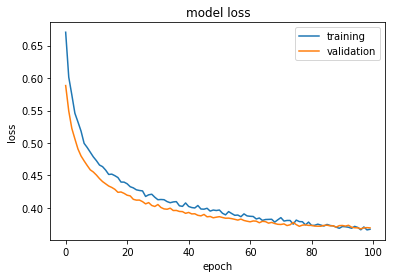

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

We can plot also the accuracy:

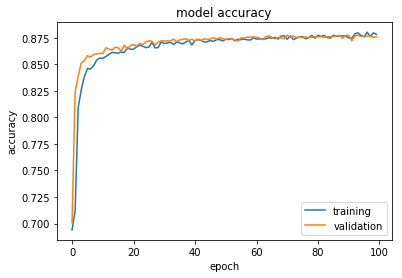

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

# AMS Score

In [14]:
def NN_output_to_AMS(x_cut, predictions, label_vectors, weights):
    
    ##### first convert NN output into 's' or 'b' labels
    pred_labels = []
    ##### first loop over y_pred [0,1]
    for i in range(len(predictions)):
        if predictions[i,1] > x_cut:
            pred_labels.append('s')
        else:
            pred_labels.append('b')
    pred_labels = pd.Series(pred_labels)

    true_labels = [] 
    ##### now loop over y_true
    for i in range(len(label_vectors)):
        if label_vectors[i,1] > x_cut:
            true_labels.append('s')
        else:
            true_labels.append('b')
    true_labels = pd.Series(true_labels)
    
    
    ##### AMS
    b_reg = 10
    s = sum(weights[(pred_labels == 's')  & (true_labels == 's')])
    b = sum(weights[(pred_labels == 's')  & (true_labels == 'b')])

    AMS = np.sqrt(      2 *( (s + b + b_reg) * np.log(1 + s/(b + b_reg)) -s )     )
    
    return AMS

In [15]:
def plot_AMS(predictions, label_vectors, weights):
    x = np.arange(0.5,1,1e-2)
    AMS_list=[]
    for x_values in x:
        AMS_list.append(NN_output_to_AMS(x_values, predictions, label_vectors, weights))
    y=np.array(AMS_list)

    plt.plot(x, y)
    plt.xlabel('Cut Parameter')
    plt.ylabel('AMS Score')
    
    print('The best AMS Score is {:.2f} at a Cut Parameter of {:.2f}'.format(max(y), x[np.argmax(y)]))

The best AMS Score is 0.54 at a Cut Parameter of 0.91


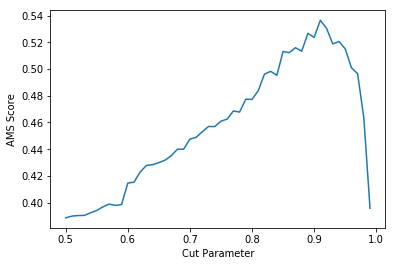

In [69]:
plot_AMS(y_pred, y_val_VBF, weights_VBF)

### Do exactly the same but for the whole 2jets set:

In [17]:
standard_2jets = StandardScaler()
standard_2jets.fit(X_2jets)
X_2jets_standard = standard_2jets.transform(X_2jets)
X_val_2jets_standard = standard_2jets.transform(X_val_2jets)

C:\Users\flori\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\flori\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\flori\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [20]:
len(X_2jets), len(X_VBF) #hopefully I will get a better AMS now because of the larger number of events 

(72543, 21257)

In [21]:
model_2 = Sequential()
l1_lambda = 0.0001
dropout=0.2
model_2.add(Dense(units=128, activation='relu', kernel_regularizer=l1(l1_lambda), input_dim=30))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=64, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=32, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=16, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=8, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=4, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_2.add(Dropout(dropout))
model_2.add(Dense(units=2, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)               

In [22]:
model_2.compile(optimizer='adagrad', #adagrad is the best one for this classification.
              loss='categorical_crossentropy', #This seems one of the best loss function.
              metrics=['accuracy'])

In [23]:
history_2 = model_2.fit(X_2jets_standard, y_train_2jets, batch_size=512, epochs=100, verbose=1, 
                  validation_data=(X_val_2jets_standard, y_val_2jets))

y_pred_2 = model_2.predict(X_val_2jets_standard)

Train on 72543 samples, validate on 29046 samples
Epoch 1/100
72543/72543 [==============================] - 1s 18us/step - loss: 0.6663 - accuracy: 0.7398 - val_loss: 0.5360 - val_accuracy: 0.8143
Epoch 2/100
72543/72543 [==============================] - 1s 15us/step - loss: 0.5763 - accuracy: 0.7960 - val_loss: 0.4910 - val_accuracy: 0.8326
Epoch 3/100
72543/72543 [==============================] - 1s 13us/step - loss: 0.5435 - accuracy: 0.8089 - val_loss: 0.4731 - val_accuracy: 0.8355
Epoch 4/100
72543/72543 [==============================] - 1s 13us/step - loss: 0.5289 - accuracy: 0.8125 - val_loss: 0.4606 - val_accuracy: 0.8387
Epoch 5/100
72543/72543 [==============================] - 1s 14us/step - loss: 0.5158 - accuracy: 0.8144 - val_loss: 0.4558 - val_accuracy: 0.8397
Epoch 6/100
72543/72543 [==============================] - 1s 13us/step - loss: 0.5069 - accuracy: 0.8184 - val_loss: 0.4488 - val_accuracy: 0.8413
Epoch 7/100
72543/72543 [==============================] - 1s 

The best AMS Score is 0.69 at a Cut Parameter of 0.88


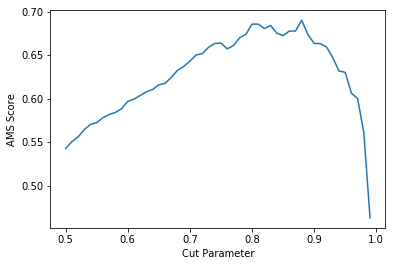

In [24]:
plot_AMS(y_pred_2, y_val_2jets, weights_2jets)

## 1 jet:

In [26]:
standard_1jet = StandardScaler()
standard_1jet.fit(X_1jet)
X_1jet_standard = standard_1jet.transform(X_1jet)
X_val_1jet_standard = standard_1jet.transform(X_val_1jet)

In [29]:
X_1jet.shape

(77544, 22)

In [30]:
model_3 = Sequential()
l1_lambda = 0.0001
dropout=0.2
model_3.add(Dense(units=128, activation='relu', kernel_regularizer=l1(l1_lambda), input_dim=22))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=64, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=32, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=16, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=8, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=4, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_3.add(Dropout(dropout))
model_3.add(Dense(units=2, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               2944      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)               

In [31]:
model_3.compile(optimizer='adagrad', #adagrad is the best one for this classification.
              loss='categorical_crossentropy', #This seems one of the best loss function.
              metrics=['accuracy'])

In [42]:
history_3 = model_3.fit(X_1jet_standard, y_train_1jet, batch_size=512, epochs=100, verbose=1, 
                  validation_data=(X_val_1jet_standard, y_val_1jet))

y_pred_3 = model_3.predict(X_val_1jet_standard)

The best AMS Score is 0.56 at a Cut Parameter of 0.73


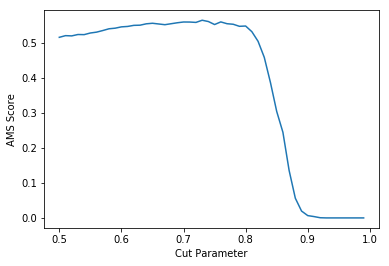

In [33]:
plot_AMS(y_pred_3, y_val_1jet, weights_1jet)

### 0 jets

In [34]:
standard_0jets = StandardScaler()
standard_0jets.fit(X_0jets)
X_0jets_standard = standard_0jets.transform(X_0jets)
X_val_0jets_standard = standard_0jets.transform(X_val_0jets)

In [35]:
X_0jets.shape

(99913, 18)

In [36]:
model_4 = Sequential()
l1_lambda = 0.0001
dropout=0.2
model_4.add(Dense(units=128, activation='relu', kernel_regularizer=l1(l1_lambda), input_dim=18))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=64, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=32, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=16, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=8, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=4, activation='relu', kernel_regularizer=l1(l1_lambda)))
model_4.add(Dropout(dropout))
model_4.add(Dense(units=2, activation='softmax'))

model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               2432      
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)               

In [37]:
model_4.compile(optimizer='adagrad', #adagrad is the best one for this classification.
              loss='categorical_crossentropy', #This seems one of the best loss function.
              metrics=['accuracy'])

In [41]:
history_4 = model_4.fit(X_0jets_standard, y_train_0jets, batch_size=512, epochs=100, verbose=1, 
                  validation_data=(X_val_0jets_standard, y_val_0jets))

y_pred_4 = model_4.predict(X_val_0jets_standard)

The best AMS Score is 0.85 at a Cut Parameter of 0.72


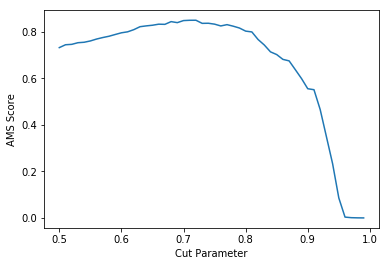

In [43]:
plot_AMS(y_pred_4, y_val_0jets, weights_0jets)

# See our total AMS with these not optimized NNs:

In [57]:
y_pred_total = np.concatenate((y_pred_4, y_pred_3, y_pred_2))
y_val_total = np.concatenate((y_val_0jets, y_val_1jet, y_val_2jets))
weights_total = np.concatenate((weights_0jets, weights_1jet, weights_2jets))

The best AMS Score is 1.19 at a Cut Parameter of 0.72


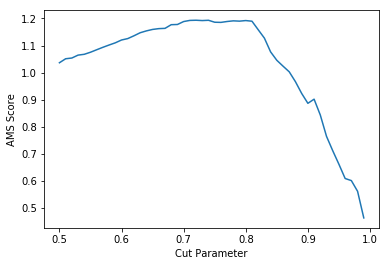

In [58]:
plot_AMS(y_pred_total, y_val_total, weights_total)

Ok this is not really good, but there should be many things I can still optimize